# Matplotlib Subplot Placement

Here we describe how to local subplots in matplotlib.
<!-- END_TEASE -->


In [ ]:
import sys
sys.exec_prefix

# Overview

We start with several figure components that we would like to arrange.

In [1]:
%pylab inline --no-import-all

def fig1():
    x = np.linspace(0, 1, 100)
    y = x**2
    plt.plot(x, y)
    plt.xlabel('x'); plt.ylabel('x^2')
    
def fig2():
    x = np.linspace(-1, 1, 100)
    y = x**3
    plt.plot(x, y)
    plt.xlabel('x'); plt.ylabel('x^3')    

Populating the interactive namespace from numpy and matplotlib


Here is a typical way of arranging the plots using subplots:

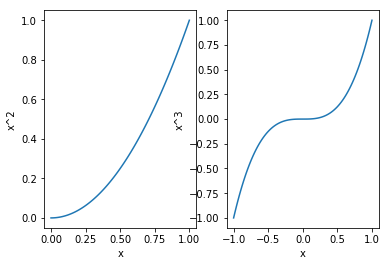

In [13]:
def fig3():
    plt.subplot(121)
    fig1()
    plt.subplot(122)
    fig2()
fig3()

Now, what if we want to locate this composite figure?  GridSpec is a good way to start.  It allows you to generate a [SubplotSpec](https://matplotlib.org/api/_as_gen/matplotlib.gridspec.SubplotSpec.html) which can be used to locate the components.  We first need to update our previous figure-drawing components to draw-themselves in a SubplotSpec.  We can reuse our previous functions (which use top-level `plt.` functions) if we set the active axis. 

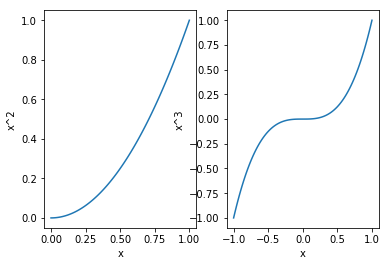

In [24]:
from functools import partial
import matplotlib.gridspec
import matplotlib as mpl

def fig3(subplot_spec=None):
    if subplot_spec is None:
        GridSpec = mpl.gridspec.GridSpec
    else:
        GridSpec = partial(mpl.gridspec.GridSpecFromSubplotSpec, 
                           subplot_spec=subplot_spec)
    gs = GridSpec(1, 2)
    ax = plt.subplot(gs[0, 0])
    fig1()
    ax = plt.subplot(gs[0, 1])
    fig2()
fig3()

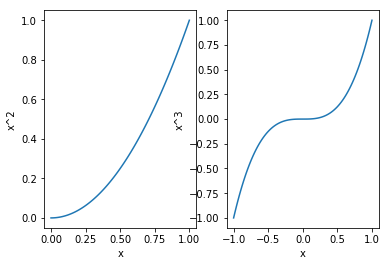

In [26]:
fig3()

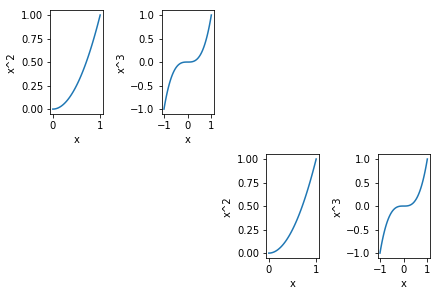

In [25]:
fig = plt.figure(constrained_layout=True)
gs = GridSpec(2, 2, figure=fig)
fig3(subplot_spec=gs[0, 0])
fig3(subplot_spec=gs[1, 1])


# Inset Axes

If you want to locate an axis precisely, you can use [`inset_axes`](https://matplotlib.org/api/_as_gen/mpl_toolkits.axes_grid1.inset_locator.inset_axes.html?highlight=inset_axes#mpl_toolkits.axes_grid1.inset_locator.inset_axes).  You can control the location by specifying the transform:

* `bbox_transform=ax.transAxes`: Coordinates will be relative to the parent axis.
* `bbox_transform=ax.transData`: Coordinates will be relative to the data points in the parent axis.
* `bbox_transform=blended_transform_factory(ax.DataAxes, ax.transAxes)`: Data coordinates for $x$ and axis coordinates in $y$.

Once this is done, locate the axis by specifying the bounding box and then the location relative to this:

* `bbox_t_anchor=(left, bottom, width, height)`: Bounding box in the specified coordinate system.
* `loc`: Location such as `lower left` or `center`.

In [64]:
from matplotlib.transforms import blended_transform_factory
blended_transform_factory?

#inset_axes?#
#trans = transforms.blended_transform_factory(
#    ax.transData, ax.transAxes)

Populating the interactive namespace from numpy and matplotlib


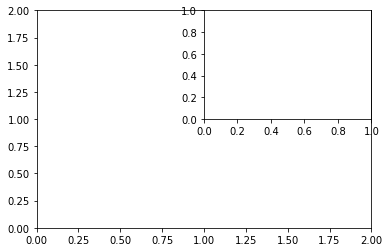

In [62]:
%pylab inline --no-import-all
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

ax = plt.subplot(111)
plt.axis([0, 2, 0, 2])
inset_axes(ax, width="100%", height="100%", 
           bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
           #bbox_transform=ax.transData, 
           loc='lower left',
           bbox_transform=ax.transAxes,
           borderpad=0)

Here we place subaxes at particular locations along $x$.

Populating the interactive namespace from numpy and matplotlib


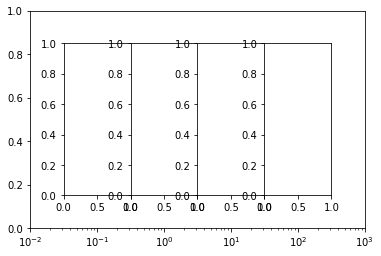

In [29]:
%pylab inline --no-import-all
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.transforms import blended_transform_factory


ax = plt.subplot(111)
ax.set_xscale('log')
ax.set_xlim(0.01, 1000)
xs = np.array([0.1, 1, 10,100])
exp_dw = np.exp(np.diff(np.log(xs)).min()/2)
for x in xs:
    inset_axes(ax, width="100%", height="70%",
               bbox_to_anchor=(x/exp_dw, 0, x*exp_dw-x/exp_dw, 1),
               #bbox_transform=ax.transData, 
               loc='center',
               bbox_transform=blended_transform_factory(
                   ax.transData,
                   ax.transAxes),
               borderpad=0)


'linear'

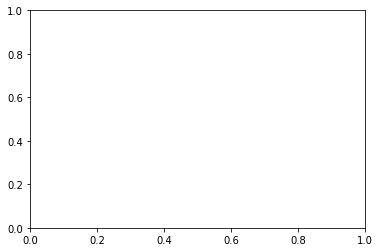

In [19]:
ax = plt.gca()
ax.get_xscale()

# References

* [](https://matplotlib.org/tutorials/intermediate/constrainedlayout_guide.html?highlight=tight%20layout#constrained-layout-guide)
* [Customizing Figure Layouts Using GridSpec and Other Functions](https://matplotlib.org/tutorials/intermediate/gridspec.html?highlight=subplotspec)